# Load modules

In [1]:
import sys, os
import gc
import numpy as np
import pandas as pd

import seaborn as sns

import japanize_matplotlib

%matplotlib inline

# Python基礎

## 数字

In [2]:
a = 1 + 2
a

3

In [3]:
type(a)

int

In [4]:
b = 1.5 + 2
b

3.5

In [5]:
type(b)

float

## 文字列

In [6]:
s = 'てすと' + 'します'
s

'てすとします'

In [7]:
type(s)

str

In [8]:
# *を使ってたくさん文字列を繋げることも可能
t = 'あいうえお' * 3
t

'あいうえおあいうえおあいうえお'

## list型

In [9]:
l = [1, 2, 3]
l

[1, 2, 3]

In [10]:
type(l)

list

In [11]:
for ii in l:
    print(ii)

1
2
3


## 辞書型

In [12]:
d = {
    'あ': 5,
    'い': 6,
    'う': 7
}

In [13]:
d['い']

6

In [14]:
type(d)

dict

In [15]:
for ii in d:
    print(ii)

あ
い
う


# DataFrame作成

row: 行.  
column: 列.カラム名=列名.

## 作り方1

pd.DataFrame(リスト, columns=リスト)

In [16]:
df0 = pd.DataFrame([['太郎', 160, 50, 20], ['次郎', 170,60,26], ['三郎', 180, 70, 30], ['四郎', 190, 80, 10]], columns=['名前', '身長', '体重', '年齢'])
df0

,名前,身長,体重,年齢
0,太郎,160,50,20
1,次郎,170,60,26
2,三郎,180,70,30
3,四郎,190,80,10


## 作り方2

pd.DataFrame(辞書)

In [17]:
df1 = pd.DataFrame({'名前': ['太郎', '次郎', '三郎', '四郎'], '身長': [160, 170, 180, 190], '体重': [50, 60, 70, 80], '年齢': [20, 26, 30, 10]})
df1

,名前,身長,体重,年齢
0,太郎,160,50,20
1,次郎,170,60,26
2,三郎,180,70,30
3,四郎,190,80,10


## 比較してみる

In [18]:
df0 == df1

,名前,身長,体重,年齢
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True


# Analysis

## カラムの指定

In [19]:
df0[['名前', '年齢']]

,名前,年齢
0,太郎,20
1,次郎,26
2,三郎,30
3,四郎,10


## 行の追加

In [20]:
df0.loc[4] = ['五郎', 200, 50, 5]
df0

,名前,身長,体重,年齢
0,太郎,160,50,20
1,次郎,170,60,26
2,三郎,180,70,30
3,四郎,190,80,10
4,五郎,200,50,5


In [21]:
df0.shape

(5, 4)

## 列の追加

### 行ごとに値が違う場合

In [22]:
df0['住所'] = ['島根', '島根', '東京', '島根', '島根']
df0

,名前,身長,体重,年齢,住所
0,太郎,160,50,20,島根
1,次郎,170,60,26,島根
2,三郎,180,70,30,東京
3,四郎,190,80,10,島根
4,五郎,200,50,5,島根


In [23]:
df0.shape

(5, 5)

### 全ての行で値が同じ場合

In [24]:
df0['性別'] = '男'
df0

,名前,身長,体重,年齢,住所,性別
0,太郎,160,50,20,島根,男
1,次郎,170,60,26,島根,男
2,三郎,180,70,30,東京,男
3,四郎,190,80,10,島根,男
4,五郎,200,50,5,島根,男


In [25]:
df0.shape

(5, 6)

## 条件を満たす行のみを抽出

In [26]:
df2 = df0[df0['住所']=='島根']
df2

,名前,身長,体重,年齢,住所,性別
0,太郎,160,50,20,島根,男
1,次郎,170,60,26,島根,男
3,四郎,190,80,10,島根,男
4,五郎,200,50,5,島根,男


In [27]:
df2.shape

(4, 6)

## 2つの列から計算して新たな列を追加

In [28]:
df0

,名前,身長,体重,年齢,住所,性別
0,太郎,160,50,20,島根,男
1,次郎,170,60,26,島根,男
2,三郎,180,70,30,東京,男
3,四郎,190,80,10,島根,男
4,五郎,200,50,5,島根,男


### BMIを追加

\[
    BMI = \frac{w}{h^2}
\nonumber
\]

In [29]:
df3 = df0.copy()
df4 = df0.copy()

### 普通の関数

In [30]:
def func0(x):
    """
    x: 引数という
    ret: 戻り値という
    """
    ret = 2 * x + 1
    return ret

In [31]:
func0(5)

11

In [32]:
def calc_bmi(row):
    """
    BMIを計算して返す
    """
    print(row)
    w = row['体重']
    h = row['身長'] / 100
    bmi = w / h**2
    return bmi

In [33]:
df3['BMI'] = df3.apply(calc_bmi, axis=1)
df3

名前     太郎
身長    160
体重     50
年齢     20
住所     島根
性別      男
Name: 0, dtype: object
名前     次郎
身長    170
体重     60
年齢     26
住所     島根
性別      男
Name: 1, dtype: object
名前     三郎
身長    180
体重     70
年齢     30
住所     東京
性別      男
Name: 2, dtype: object
名前     四郎
身長    190
体重     80
年齢     10
住所     島根
性別      男
Name: 3, dtype: object
名前     五郎
身長    200
体重     50
年齢      5
住所     島根
性別      男
Name: 4, dtype: object


,名前,身長,体重,年齢,住所,性別,BMI
0,太郎,160,50,20,島根,男,19.531250
1,次郎,170,60,26,島根,男,20.761246
2,三郎,180,70,30,東京,男,21.604938
3,四郎,190,80,10,島根,男,22.160665
4,五郎,200,50,5,島根,男,12.500000


### lambda関数

In [34]:
# xを渡すと2x+1を返す関数
f = (lambda x: 2*x+1)
f

<function __main__.<lambda>(x)>

In [35]:
f(5)

11

### apply()の中にlambdaを入れる

In [36]:
df4['BMI'] = df4.apply(lambda row: row['体重'] / ((row['身長']/100)**2), axis=1)
df4

,名前,身長,体重,年齢,住所,性別,BMI
0,太郎,160,50,20,島根,男,19.531250
1,次郎,170,60,26,島根,男,20.761246
2,三郎,180,70,30,東京,男,21.604938
3,四郎,190,80,10,島根,男,22.160665
4,五郎,200,50,5,島根,男,12.500000


In [37]:
df3 == df4

,名前,身長,体重,年齢,住所,性別,BMI
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True


## 統計量を見る

In [38]:
df3.describe()

,身長,体重,年齢,BMI
count,5.000000,5.000000,5.000000,5.000000
mean,180.000000,62.000000,18.200000,19.311620
std,15.811388,13.038405,10.545141,3.934596
min,160.000000,50.000000,5.000000,12.500000
25%,170.000000,50.000000,10.000000,19.531250
50%,180.000000,60.000000,20.000000,20.761246
75%,190.000000,70.000000,26.000000,21.604938
max,200.000000,80.000000,30.000000,22.160665


## mean()など単体でも関数としてあるので使える

In [39]:
# 平均
df3.mean()

身長     180.00000
体重      62.00000
年齢      18.20000
BMI     19.31162
dtype: float64

In [40]:
# 最大値
df3.max()

名前          次郎
身長         200
体重          80
年齢          30
住所          東京
性別           男
BMI    22.1607
dtype: object

In [41]:
df0

,名前,身長,体重,年齢,住所,性別
0,太郎,160,50,20,島根,男
1,次郎,170,60,26,島根,男
2,三郎,180,70,30,東京,男
3,四郎,190,80,10,島根,男
4,五郎,200,50,5,島根,男


In [42]:
df3

,名前,身長,体重,年齢,住所,性別,BMI
0,太郎,160,50,20,島根,男,19.531250
1,次郎,170,60,26,島根,男,20.761246
2,三郎,180,70,30,東京,男,21.604938
3,四郎,190,80,10,島根,男,22.160665
4,五郎,200,50,5,島根,男,12.500000


In [43]:
gc.collect()

7

## 相関を見る

### 相関dataframe

In [44]:
corr = df3.corr()
corr

,身長,体重,年齢,BMI
身長,1.000000,0.242536,-0.689724,-0.508873
体重,0.242536,1.000000,0.123644,0.710680
年齢,-0.689724,0.123644,1.000000,0.634566
BMI,-0.508873,0.710680,0.634566,1.000000


### ヒートマップの作成

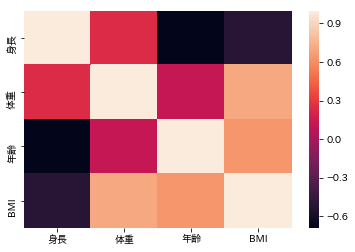

In [45]:
sns.heatmap(corr)

## ダミー変数化

In [48]:
df3

,名前,身長,体重,年齢,住所,性別,BMI
0,太郎,160,50,20,島根,男,19.531250
1,次郎,170,60,26,島根,男,20.761246
2,三郎,180,70,30,東京,男,21.604938
3,四郎,190,80,10,島根,男,22.160665
4,五郎,200,50,5,島根,男,12.500000


In [50]:
df4 = pd.get_dummies(df3, columns=['住所'])
df4

,名前,身長,体重,年齢,性別,BMI,住所_島根,住所_東京
0,太郎,160,50,20,男,19.531250,1,0
1,次郎,170,60,26,男,20.761246,1,0
2,三郎,180,70,30,男,21.604938,0,1
3,四郎,190,80,10,男,22.160665,1,0
4,五郎,200,50,5,男,12.500000,1,0


# Save data

## DataFrameをExcelとして保存してみる

In [46]:
df3.to_excel('../output/df3.xlsx', index=False)

## Excelを読み込んでDataFrameを作成する

In [47]:
df5 = pd.read_excel('../output/df3.xlsx', index=False)
df5

,名前,身長,体重,年齢,住所,性別,BMI
0,太郎,160,50,20,島根,男,19.531250
1,次郎,170,60,26,島根,男,20.761246
2,三郎,180,70,30,東京,男,21.604938
3,四郎,190,80,10,島根,男,22.160665
4,五郎,200,50,5,島根,男,12.500000
